In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

from config import PATH

df = pd.read_csv(PATH, index_col=0)

In [9]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [10]:
df.info()
display(df.describe())
display(df.head(10))

<class 'pandas.core.frame.DataFrame'>
Index: 7510522 entries, 0 to 7510521
Data columns (total 9 columns):
 #   Column     Dtype         
---  ------     -----         
 0   userid     object        
 1   sessionid  int64         
 2   timestamp  datetime64[ns]
 3   action     object        
 4   value      float64       
 5   category   object        
 6   age        int64         
 7   gender     object        
 8   city       object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 573.0+ MB


,sessionid,timestamp,value,age
count,7.510522e+06,7510522,7.510522e+06,7.510522e+06
mean,2.805611e+02,2023-07-02 12:12:15.128161792,2.069225e+03,3.598401e+01
min,1.000000e+00,2021-12-26 21:00:28,0.000000e+00,7.000000e+00
25%,1.410000e+02,2022-09-29 20:42:51,0.000000e+00,2.100000e+01
50%,2.810000e+02,2023-07-02 17:51:00,0.000000e+00,3.400000e+01
75%,4.200000e+02,2024-04-03 04:12:19.500000,0.000000e+00,4.800000e+01
max,5.860000e+02,2025-01-03 20:59:30,2.116800e+05,8.100000e+01
std,1.617851e+02,NaN,7.412838e+03,1.826152e+01


,userid,sessionid,timestamp,action,value,category,age,gender,city
0,user_10000,1,2021-12-30 12:28:45,category,0.000000,Товары для детей,42,Ж,Красноярск
1,user_10000,1,2021-12-30 12:29:10,search,0.000000,Товары для детей,42,Ж,Красноярск
2,user_10000,1,2021-12-30 12:29:25,product,0.000000,Товары для детей,42,Ж,Красноярск
3,user_10000,1,2021-12-30 12:29:26,search,0.000000,Товары для детей,42,Ж,Красноярск
4,user_10000,1,2021-12-30 12:29:34,search,0.000000,Товары для детей,42,Ж,Красноярск
5,user_10000,1,2021-12-30 12:29:46,product,0.000000,Товары для детей,42,Ж,Красноярск
6,user_10000,1,2021-12-30 12:30:14,search,0.000000,Товары для детей,42,Ж,Красноярск
7,user_10000,1,2021-12-30 12:30:45,category,0.000000,Товары для детей,42,Ж,Красноярск
8,user_10000,1,2021-12-30 12:30:48,cart,5735.262266,Авто/мото товары,42,Ж,Красноярск
9,user_10000,1,2021-12-30 12:30:52,checkout,6130.000000,NaN,42,Ж,Красноярск


In [4]:
a = df.nunique()
print(a)

userid          2500
sessionid        586
timestamp    7168835
action             7
value         170213
category           6
age               75
gender             2
city              14
dtype: int64


In [5]:
for name in ['action', 'city', 'age', 'gender', 'category']:
    print(df[name].value_counts())

action
search          2094744
product         2012382
category        1595004
mainpage         823706
cart             696711
checkout         191520
confirmation      96455
Name: count, dtype: int64
city
Москва             2104849
Санкт-Петербург     948642
Новосибирск         575670
Екатеринбург        543015
Нижний Новгород     428970
Казань              395626
Красноярск          352194
Волгоград           333001
Ростов-на-Дону      330872
Самара              324321
Челябинск           297719
Воронеж             294179
Омск                292162
Уфа                 289302
Name: count, dtype: int64
age
35    192778
25    179308
29    174444
32    173640
23    171297
       ...  
78     32809
77     32777
79     27145
80     18090
81     15053
Name: count, Length: 75, dtype: int64
gender
Ж    4342998
М    3167524
Name: count, dtype: int64
category
Товары для детей                 1172161
Красота и здоровье               1109183
Одежда и обувь                   1105299
Электроника и 

<Figure size 2200x400 with 0 Axes>

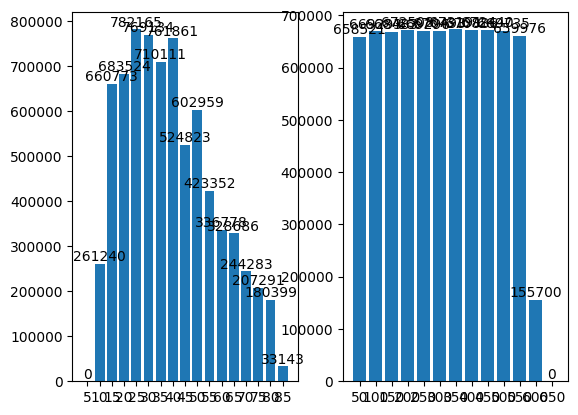

In [21]:
plt.figure(figsize=(22, 4))
fig, axs = plt.subplots(1, 2)

bin_age, _ = np.histogram(df['age'], bins=(bins_size:=range(0, 90, 5)))
labels = [f'{b}' for a, b in zip(bins_size, bins_size[1:])]  # f'{a} to {b}'
bar = axs[0].bar(labels, bin_age)
_ = axs[0].bar_label(bar)

bin_sid, _ = np.histogram(df['sessionid'], bins=(bins_size:=range(0, 700, 50)))
labels = [f'{b}' for a, b in zip(bins_size, bins_size[1:])]  # f'{a} to {b}'
bar = axs[1].bar(labels, bin_sid)
_ = axs[1].bar_label(bar)

plt.show()

<Figure size 1600x1100 with 0 Axes>

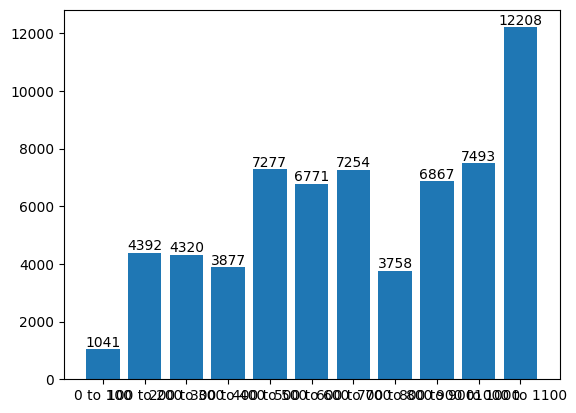

In [28]:
df['days'] = df['timestamp'] - df['timestamp'].min()
df['days'] = df['days'].apply(lambda x: x.days)

bins_size = list(range(0, 1150, 100))

bin_age, _ = np.histogram(df['days'], bins=bins_size)
labels = [f'{a} to {b}' for a, b in zip(bins_size, bins_size[1:])]
bin_age -= 675000

plt.figure(figsize = (16, 11))
fig, axs = plt.subplots()
bar = axs.bar(labels, bin_age)
_ = axs.bar_label(bar)
plt.show()

df.drop('days', axis=1, inplace=True)

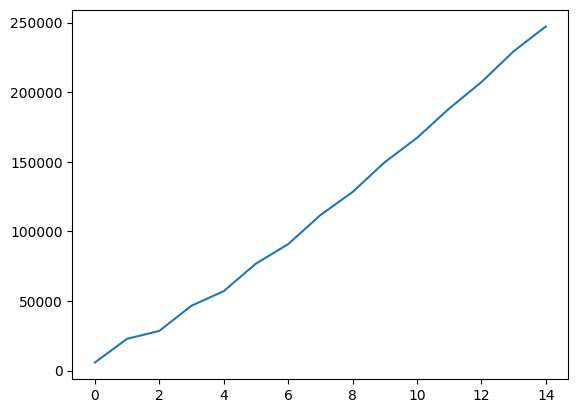

In [45]:
# ['userid', 'sessionid', 'timestamp', 'action', 'value', 'category', 'age', 'gender', 'city']
# df[df.duplicated(subset=['userid', 'sessionid', 'action', 'category', 'age', 'gender', 'city'],
#                  keep=False)]

h = []

for i in range(15):
    df2 = df.copy()
    df2['timestamp'] = df2['timestamp'].dt.round(f'{i+1}s')

    h.append(len(df2[df2.duplicated(keep=False)]))

plt.plot(range(15), h)
plt.show()


# df2 = df.copy()
# df2['timestamp'] = df2['timestamp'].dt.round(f'1s')
# df[df.duplicated(subset=['userid', 'sessionid', 'timestamp', 'action', 'value', 'age', 'gender', 'city'],
#                  keep=False)]

In [54]:
a = df[df['age'] > 90]
# a = df[df['value'] > 200000]

print(len(a))
display(a)

0


,userid,sessionid,timestamp,action,value,category,age,gender,city


In [15]:
for name in df:
    print(name, len(df[df[name].isna()]))
    
df3 = df[df['category'].isna()].copy()
display(df.describe())
display(df3.describe())

userid 0
sessionid 0
timestamp 0
action 0
value 0
category 1111681
age 0
gender 0
city 0


,sessionid,timestamp,value,age
count,7.510522e+06,7510522,7.510522e+06,7.510522e+06
mean,2.805611e+02,2023-07-02 12:12:15.128161792,2.069225e+03,3.598401e+01
min,1.000000e+00,2021-12-26 21:00:28,0.000000e+00,7.000000e+00
25%,1.410000e+02,2022-09-29 20:42:51,0.000000e+00,2.100000e+01
50%,2.810000e+02,2023-07-02 17:51:00,0.000000e+00,3.400000e+01
75%,4.200000e+02,2024-04-03 04:12:19.500000,0.000000e+00,4.800000e+01
max,5.860000e+02,2025-01-03 20:59:30,2.116800e+05,8.100000e+01
std,1.617851e+02,NaN,7.412838e+03,1.826152e+01


,sessionid,timestamp,value,age
count,1.111681e+06,1111681,1.111681e+06,1.111681e+06
mean,2.806081e+02,2023-07-02 14:27:24.398341888,1.787516e+03,3.596563e+01
min,1.000000e+00,2021-12-26 21:02:41,0.000000e+00,7.000000e+00
25%,1.410000e+02,2022-09-29 17:47:12,0.000000e+00,2.100000e+01
50%,2.810000e+02,2023-07-02 20:23:01,0.000000e+00,3.400000e+01
75%,4.200000e+02,2024-04-03 07:17:27,3.360000e+02,4.800000e+01
max,5.860000e+02,2025-01-03 20:57:41,8.940000e+04,8.100000e+01
std,1.617647e+02,NaN,4.555742e+03,1.825852e+01
